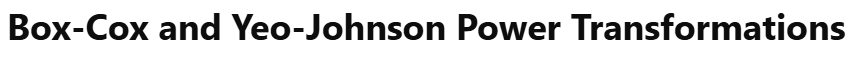

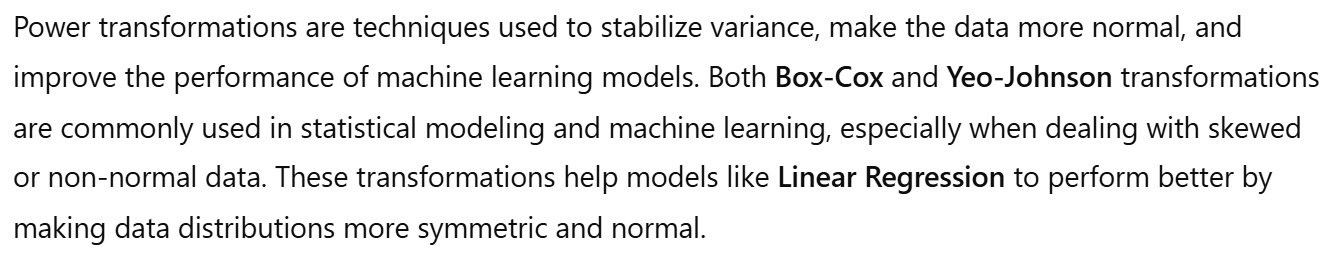

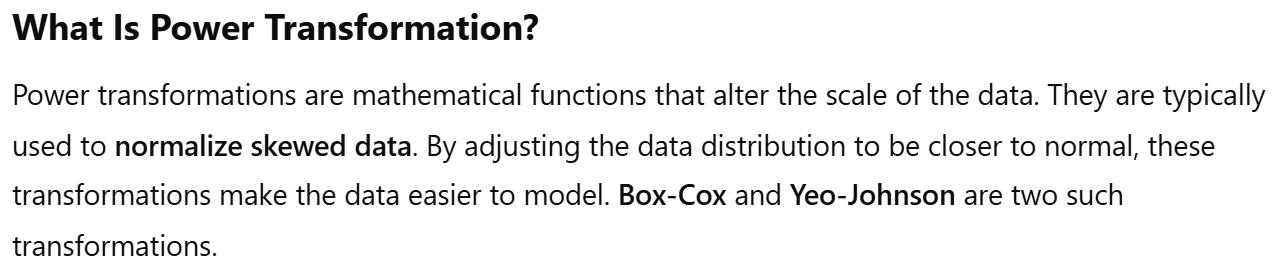

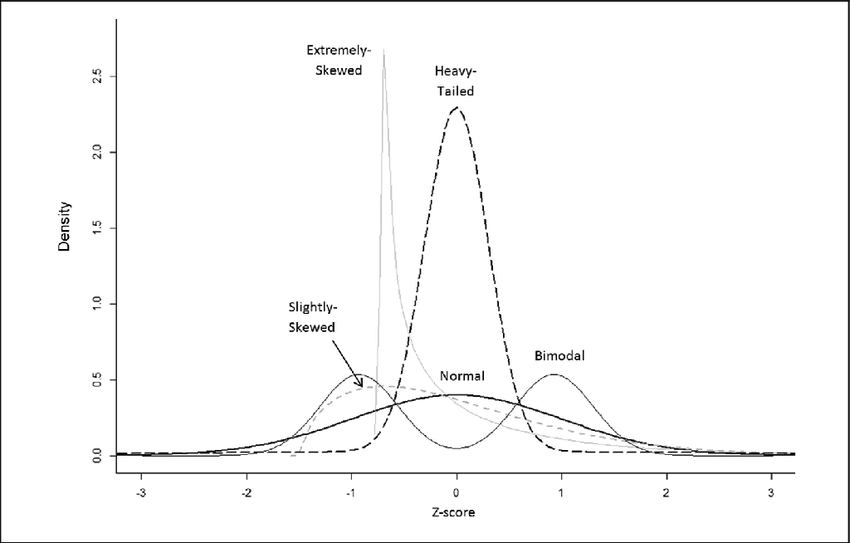

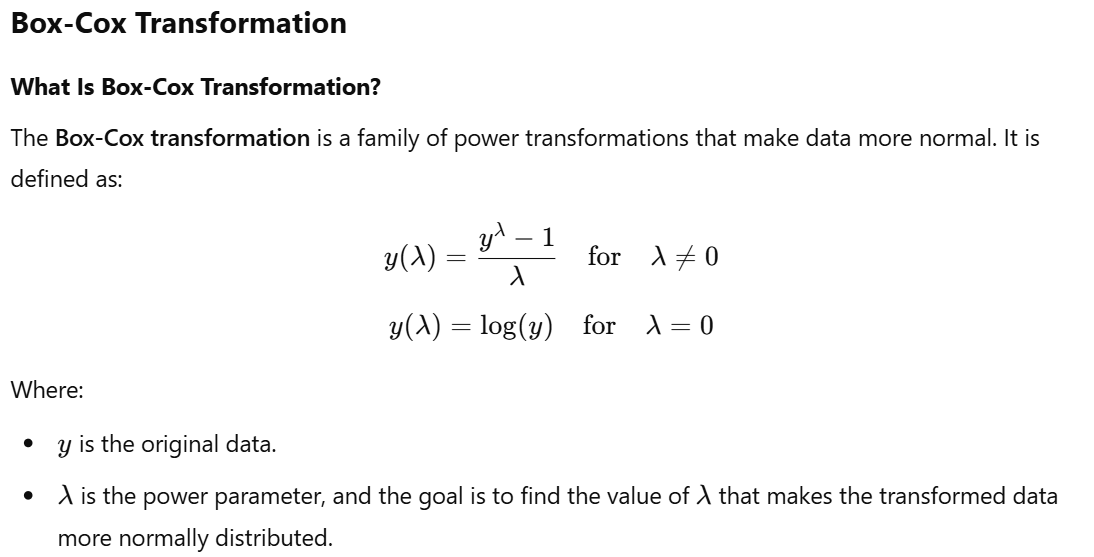

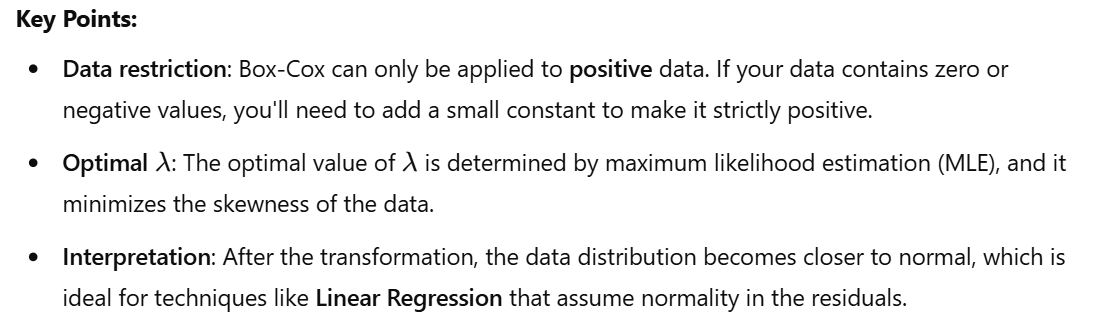

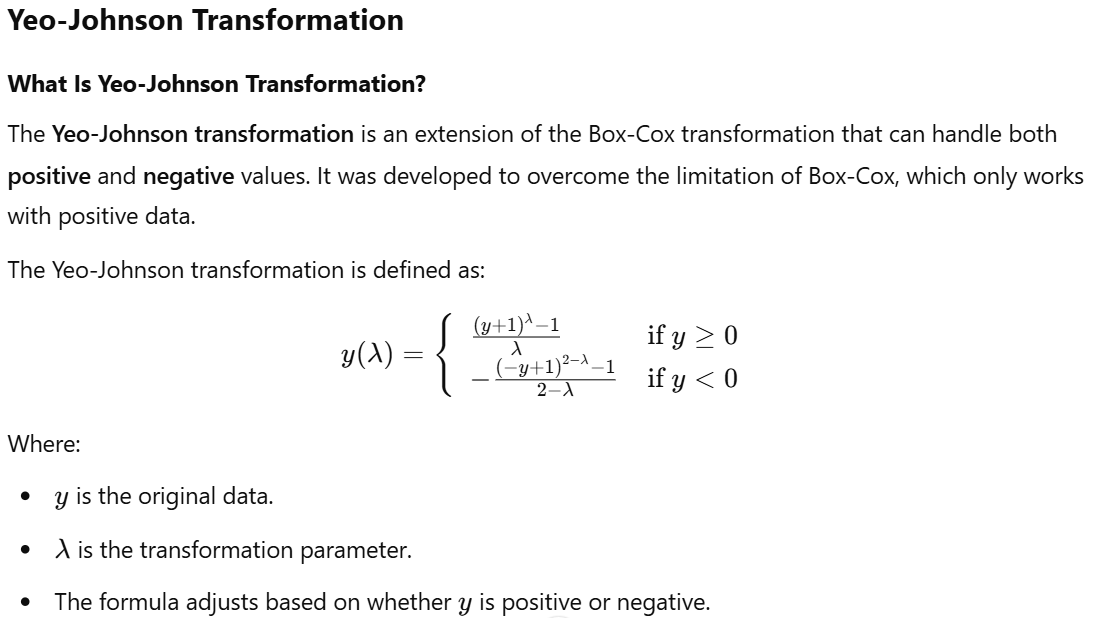

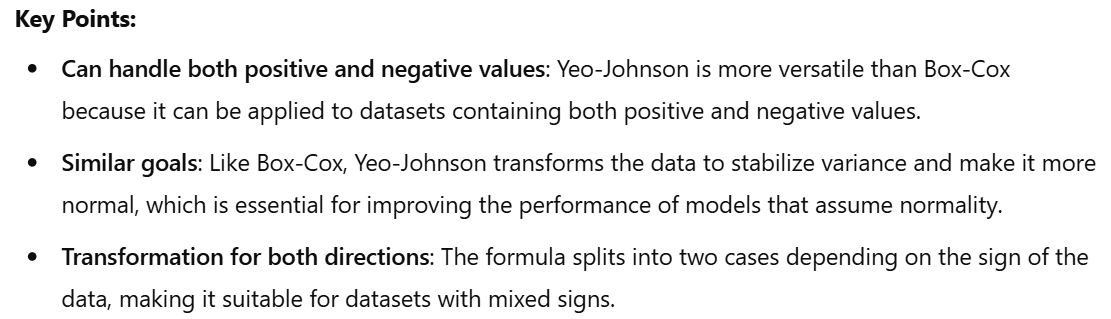

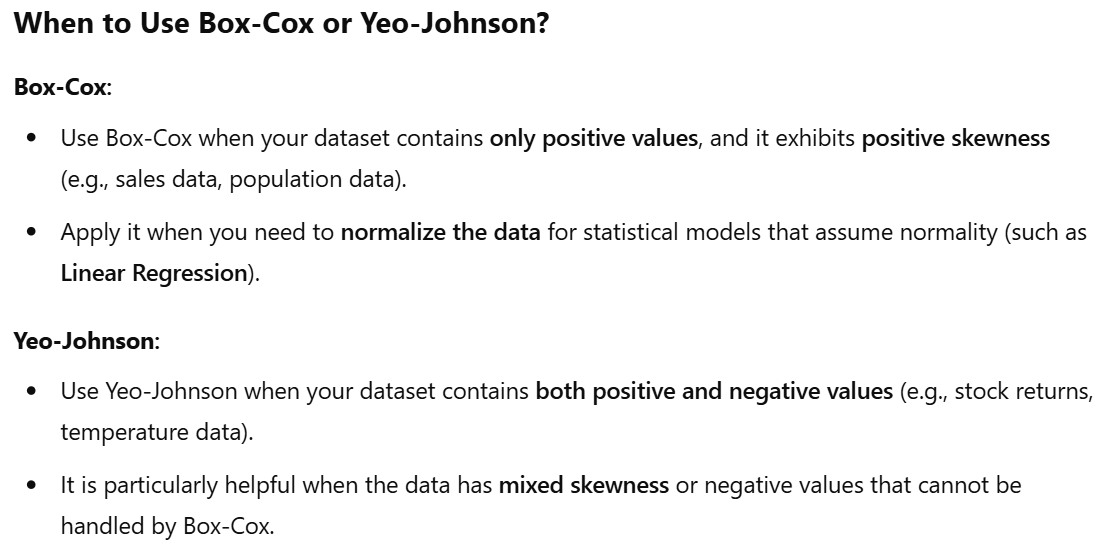

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor

In [20]:
df = pd.read_csv('coffee_shop_revenue.csv')

In [21]:
df.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [22]:
df.shape

(2000, 7)

In [23]:
df.isnull().sum()

Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64

In [24]:
df.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


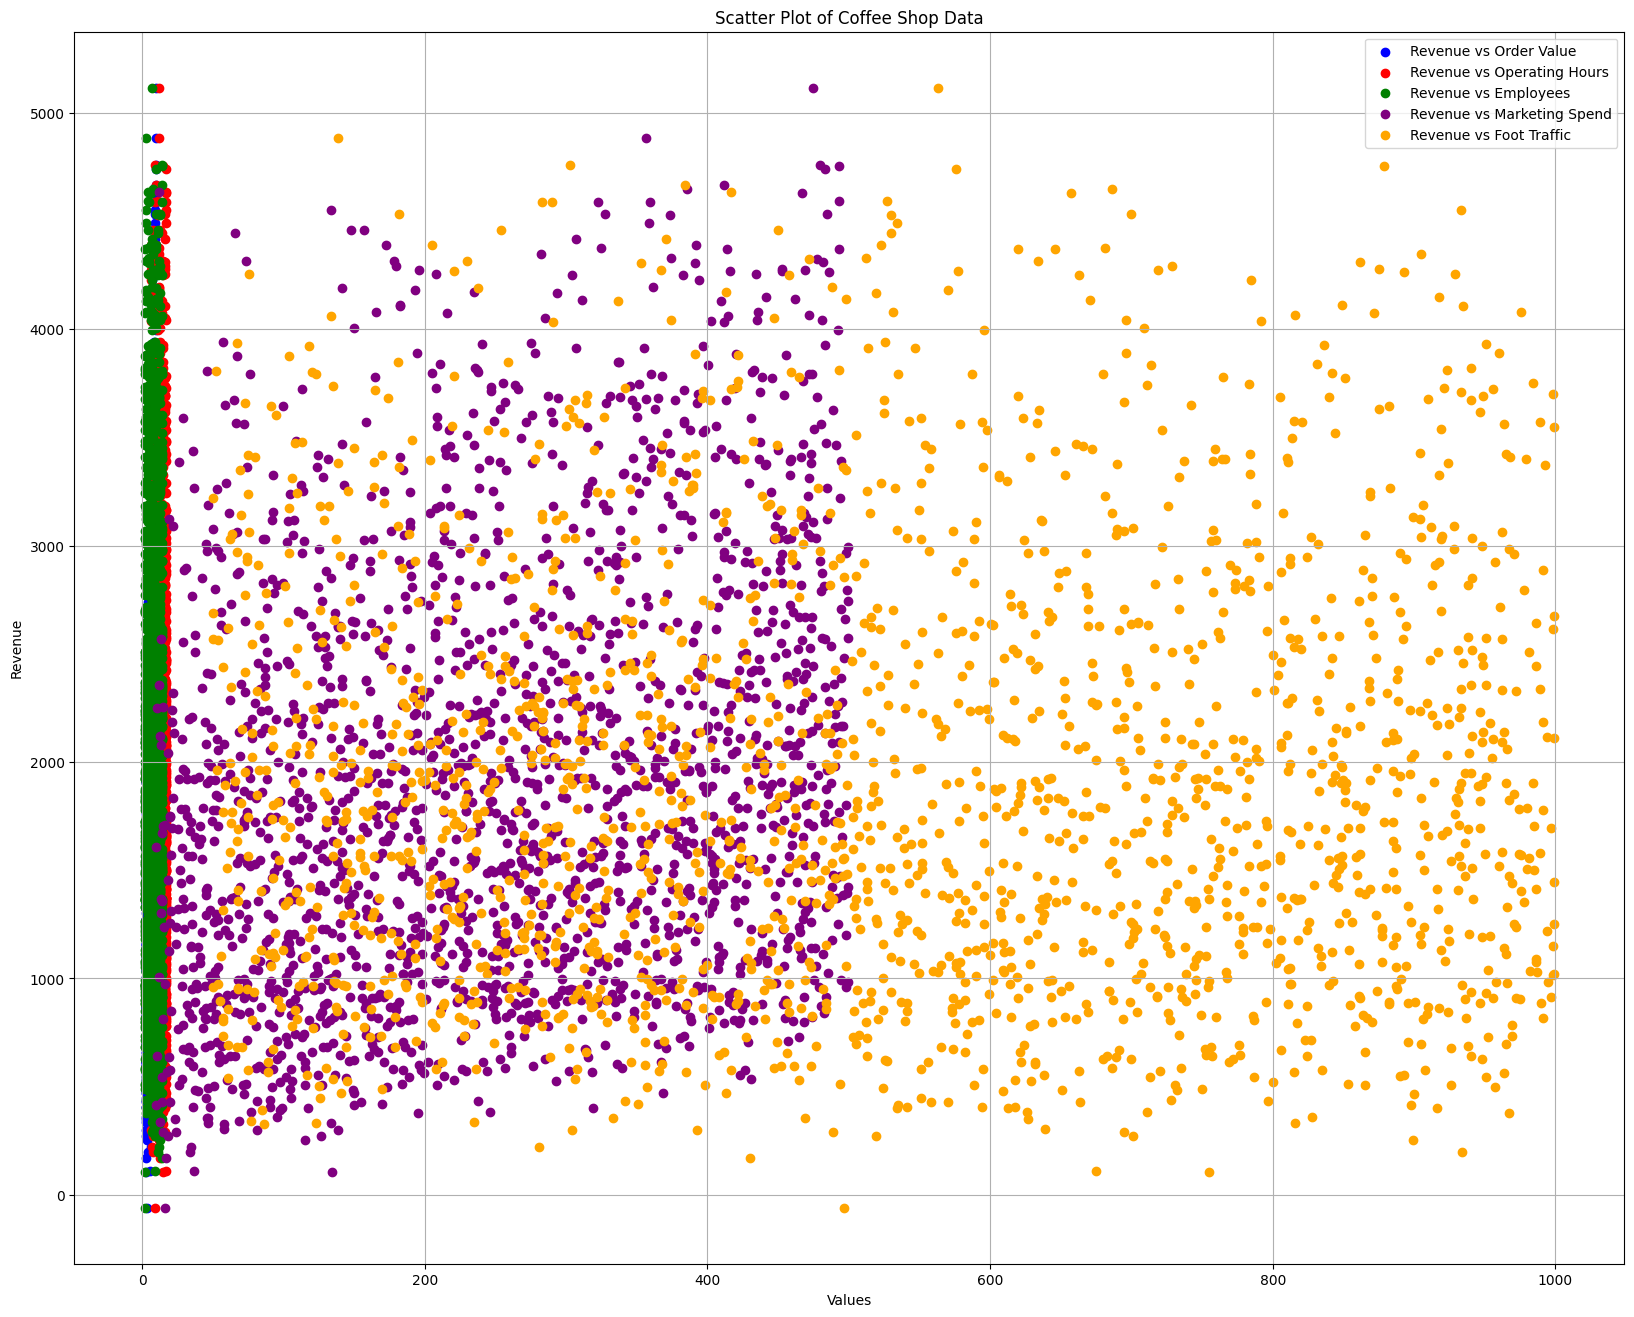

In [25]:
# Plot the points on a scatter plot
plt.figure(figsize=(20, 16))
plt.scatter(df['Average_Order_Value'], df['Daily_Revenue'],  color='blue', label='Revenue vs Order Value')
plt.scatter(df['Operating_Hours_Per_Day'], df['Daily_Revenue'], color='red', label='Revenue vs Operating Hours')
plt.scatter(df['Number_of_Employees'], df['Daily_Revenue'], color='green', label='Revenue vs Employees')
plt.scatter(df['Marketing_Spend_Per_Day'], df['Daily_Revenue'], color='purple', label='Revenue vs Marketing Spend')
plt.scatter(df['Location_Foot_Traffic'], df['Daily_Revenue'], color='orange', label='Revenue vs Foot Traffic')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Revenue')
plt.title('Scatter Plot of Coffee Shop Data')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
X = df.drop(columns=['Daily_Revenue'])
y = df.iloc[:, -1]

In [27]:
X.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic
0,152,6.74,14,4,106.62,97
1,485,4.50,12,8,57.83,744
2,398,9.09,6,6,91.76,636
3,320,8.48,17,4,462.63,770
4,156,7.44,17,2,412.52,232


In [28]:
y

0       1547.81
1       2084.68
2       3118.39
3       2912.20
4       1663.42
         ...   
1995    2816.85
1996     337.97
1997     951.34
1998    4266.21
1999     914.24
Name: Daily_Revenue, Length: 2000, dtype: float64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [31]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [33]:
# Define the pipeline with Polynomial Features and Linear Regression
poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Fit the model on the training data
poly.fit(X_train, y_train)

# Make predictions
y_pred = poly.predict(X_test)

In [35]:
print("Polynomial Regression R²:", r2_score(y_test, poly.predict(X_test))*100)
print("Random Forest R²:", r2_score(y_test, rf.predict(X_test))*100)
print("Gradient Boosting R²:", r2_score(y_test, gbr.predict(X_test))*100)
print("Linear Regression R2 : ", r2_score(y_test, lr.predict(X_test))*100)

Polynomial Regression R²: 95.88991453575366
Random Forest R²: 94.91618691981996
Gradient Boosting R²: 94.90580214638368
Linear Regression R2 :  89.55768408109977


In [36]:
# Perform Cross-Validation
print("Polynomial Regression R²:", np.mean(cross_val_score(poly, X, y, scoring='r2', cv=5)))
print("Random Forest R²:", np.mean(cross_val_score(rf, X, y, scoring='r2', cv=5)))
print("Gradient Boosting R²:", np.mean(cross_val_score(gbr, X, y, scoring='r2', cv=5)))
print("Linear Regression R²:", np.mean(cross_val_score(lr, X, y, scoring='r2', cv=5)))

Polynomial Regression R²: 0.956641441511324
Random Forest R²: 0.9457313869263835
Gradient Boosting R²: 0.9489190255072841
Linear Regression R²: 0.8900934489336807


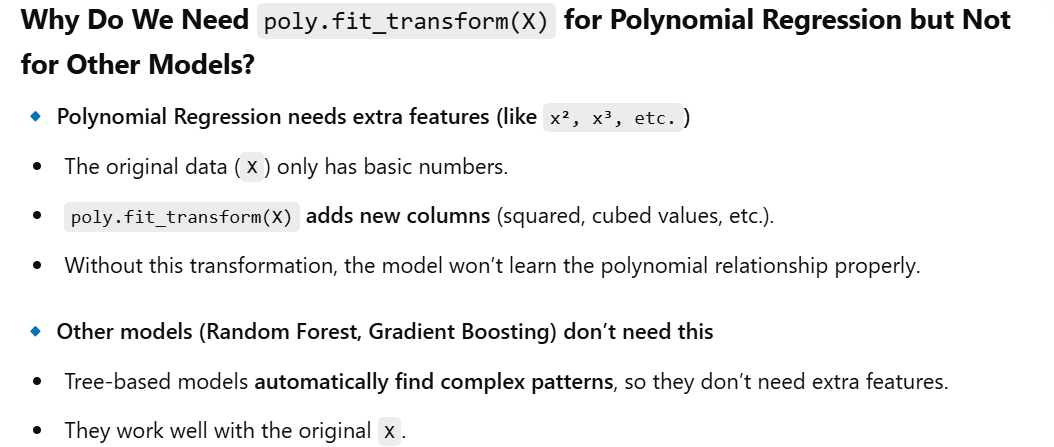

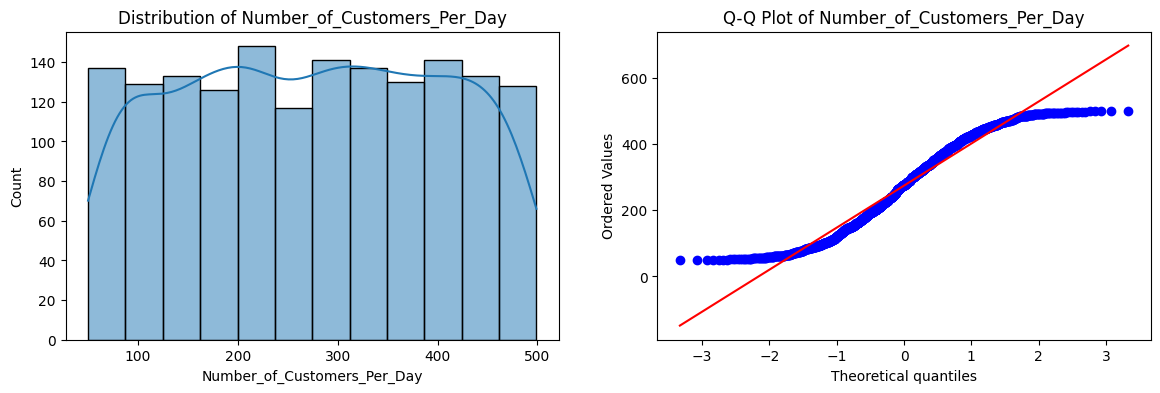

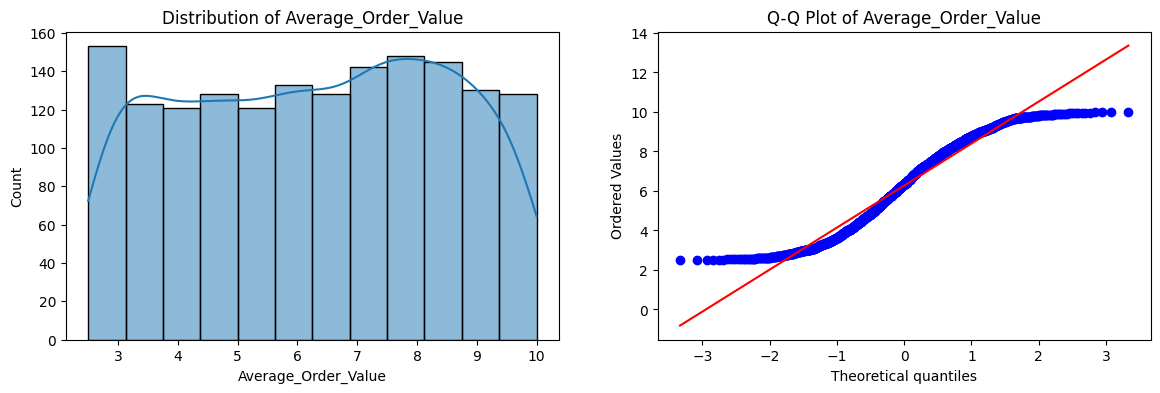

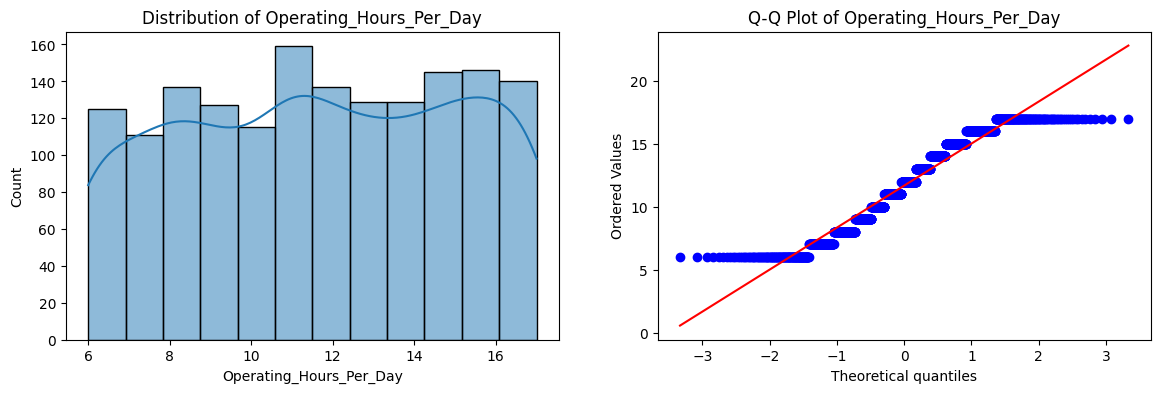

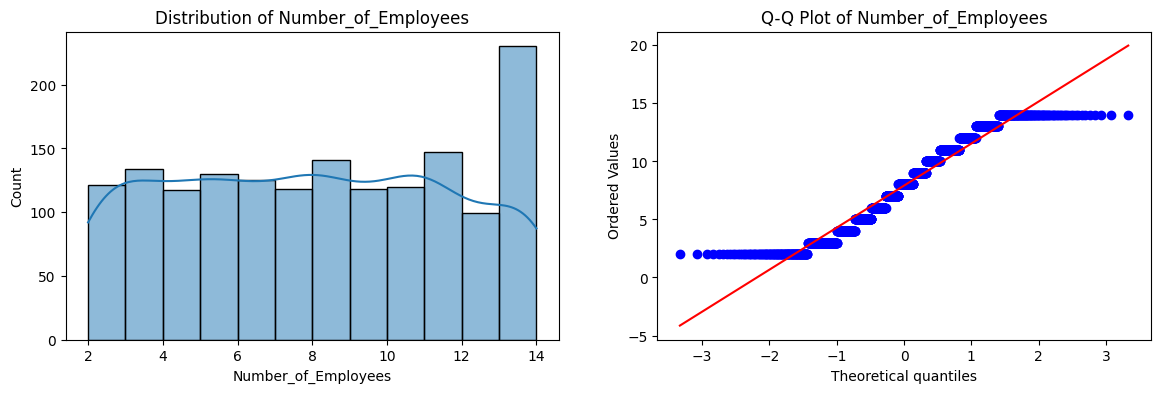

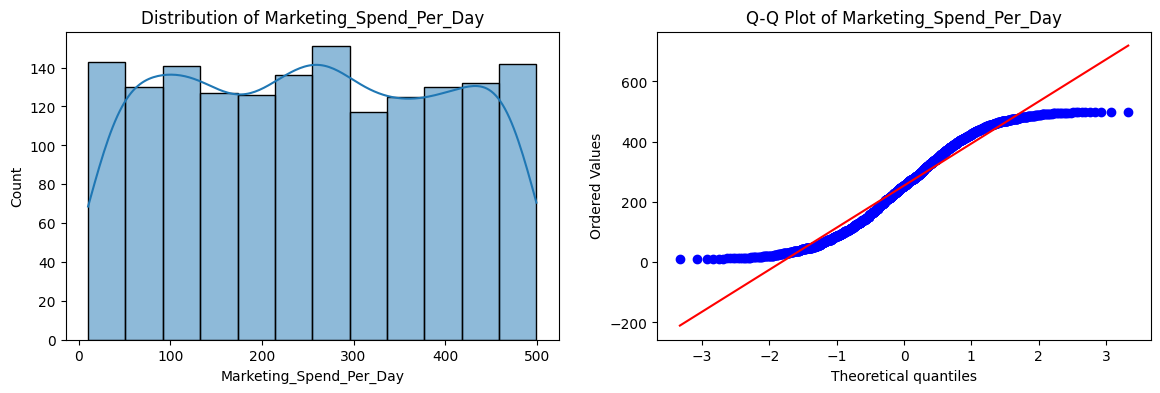

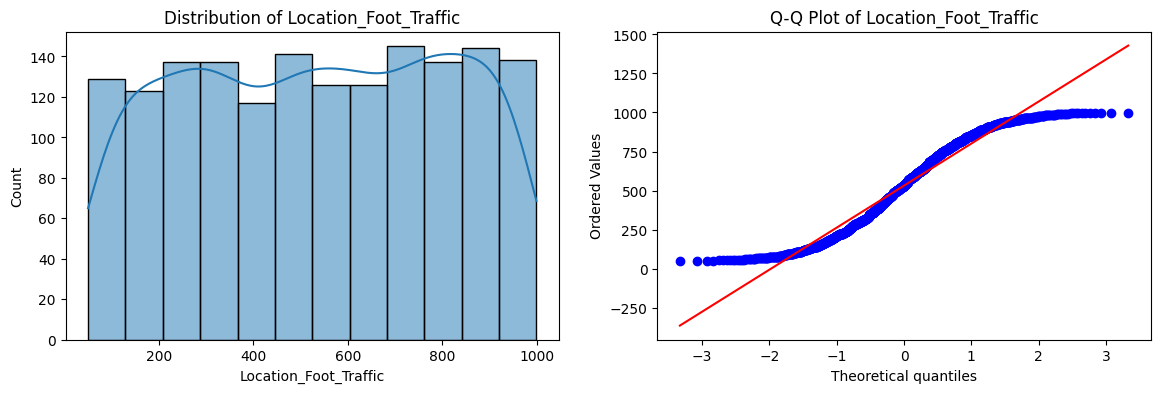

In [37]:
# Plotting the distplots without any transformation

# Plot distributions and probability plots
for col in X_train.columns:
    plt.figure(figsize=(14, 4))

    # Histogram (New replacement for distplot)
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)  # kde=True adds a smooth curve
    plt.title(f"Distribution of {col}")

    # QQ Plot
    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col}")

    plt.show()

In [38]:
# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Number_of_Customers_Per_Day,0.758569
1,Average_Order_Value,0.838868
2,Operating_Hours_Per_Day,0.865663
3,Number_of_Employees,0.705124
4,Marketing_Spend_Per_Day,0.709788
5,Location_Foot_Traffic,0.761950


In [46]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_transformed, y_train)
y_pred = poly_model.predict(X_test_transformed)

In [47]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_transformed, y_train)
y_pred = rf.predict(X_test_transformed)

In [48]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train_transformed, y_train)
y_pred = gbr.predict(X_test_transformed)

In [49]:
lr = LinearRegression()
lr.fit(X_train_transformed, y_train)
y_pred = rf.predict(X_test_transformed)

In [50]:
print("Polynomial Regression R²:", r2_score(y_test, poly_model.predict(X_test_transformed))*100)
print("Random Forest R²:", r2_score(y_test, rf.predict(X_test_transformed))*100)
print("Gradient Boosting R²:", r2_score(y_test, gbr.predict(X_test_transformed))*100)
print("Linear Regression R2 : ", r2_score(y_test, lr.predict(X_test_transformed))*100)

Polynomial Regression R²: 95.85846295176724
Random Forest R²: 94.90720539150861
Gradient Boosting R²: 94.88286257415591
Linear Regression R2 :  89.32250045170798


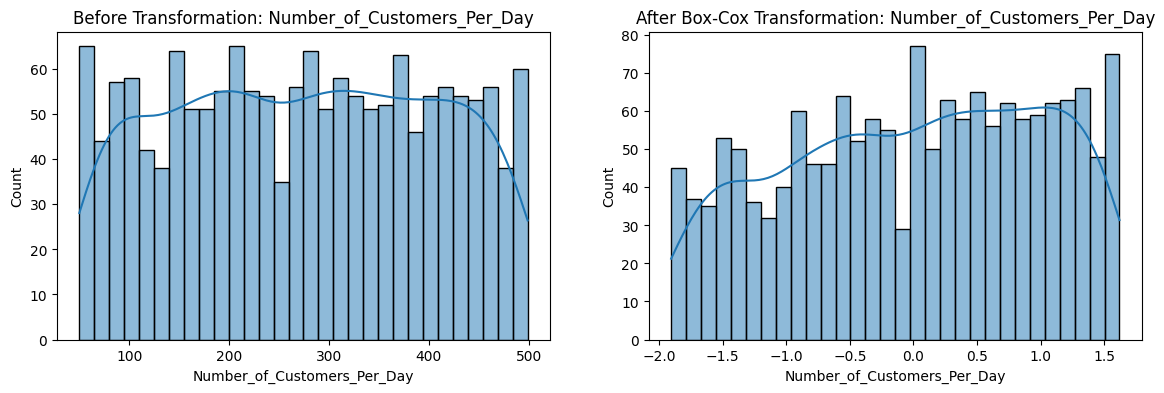

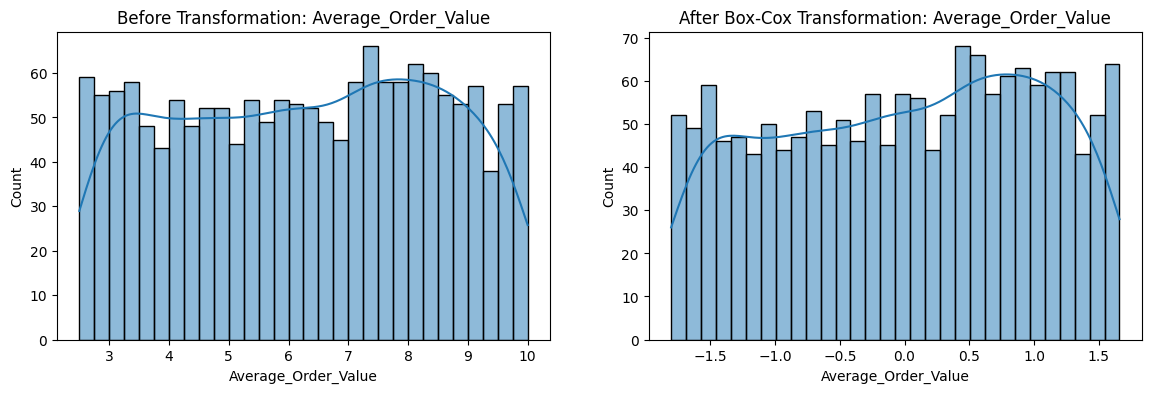

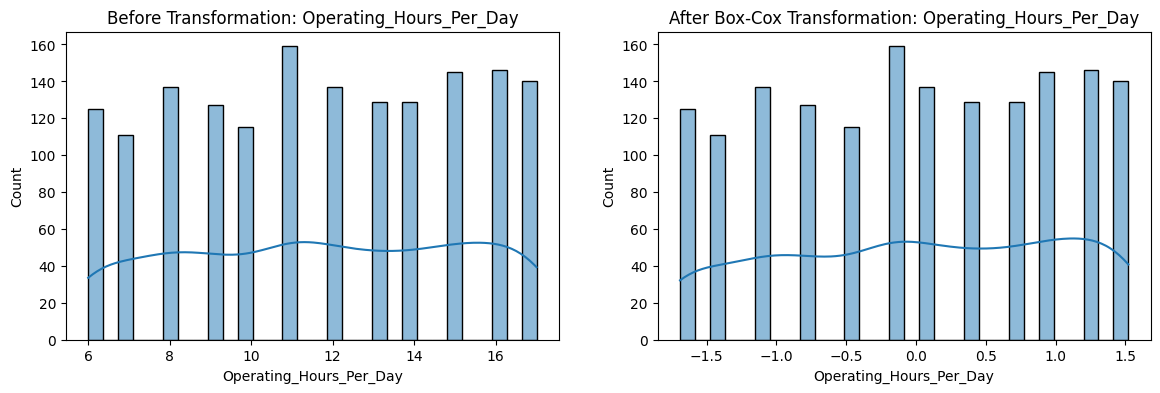

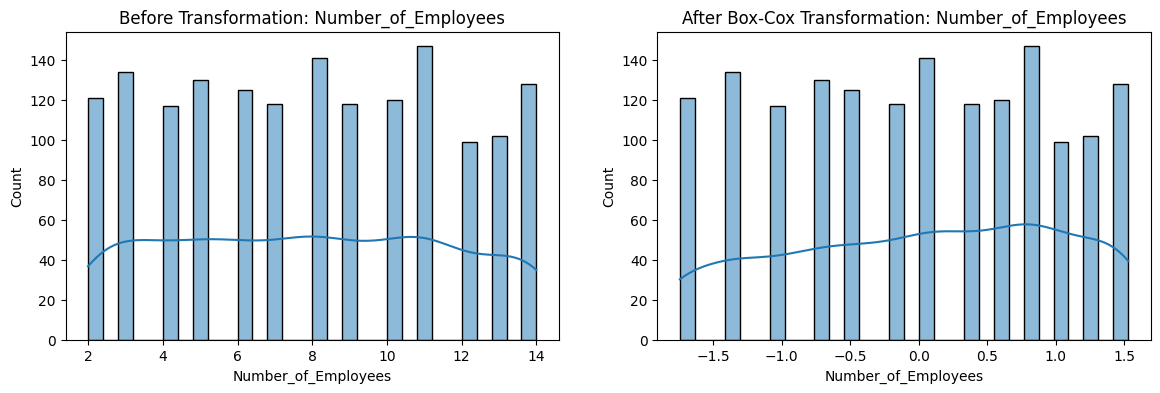

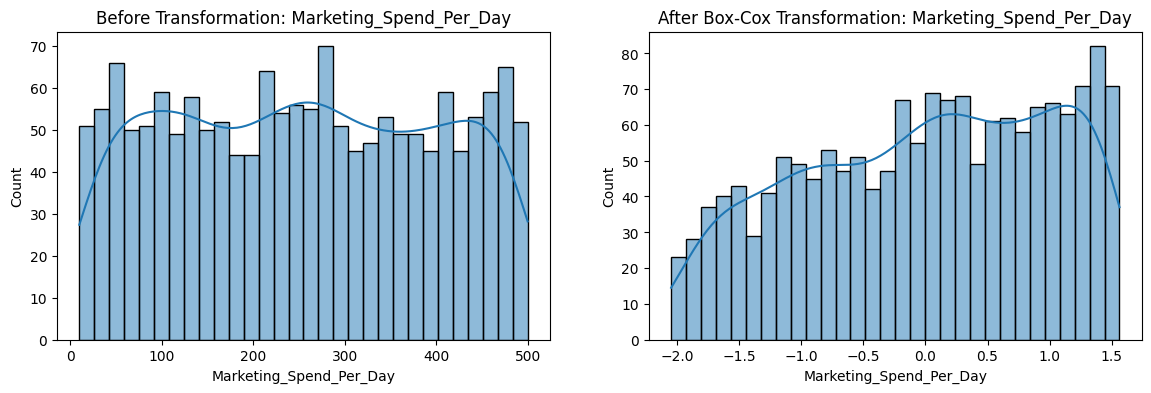

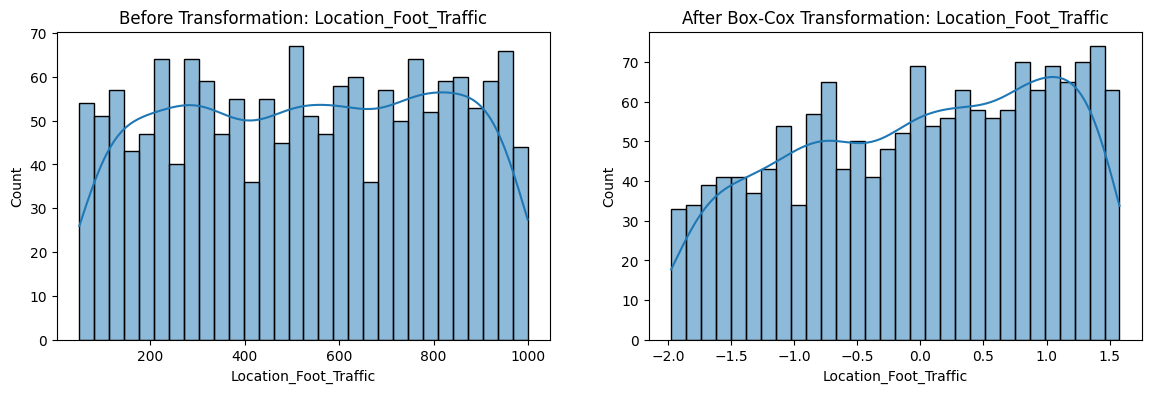

In [55]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

# Plot Before & After Box-Cox Transformation
for col in X_train.columns:
    plt.figure(figsize=(14, 4))

    # Original distribution
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.title(f"Before Transformation: {col}")

    # Transformed distribution
    plt.subplot(122)
    sns.histplot(X_train_transformed[col], kde=True, bins=30)
    plt.title(f"After Box-Cox Transformation: {col}")

    plt.show()

In [56]:
# Apply PowerTransformer (Yeo-Johnson by default)
pt1 = PowerTransformer()
X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

# Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train & Predict for each model
for name, model in models.items():
    model.fit(X_train_transformed2, y_train)  # Train the model
    y_pred = model.predict(X_test_transformed2)  # Make predictions

    # Print R² Score
    print(f"{name} R² Score (Transformed Data): {r2_score(y_test, y_pred):.4f}")

# For Polynomial Regression (additional step)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Apply Polynomial Features (degree=2 as an example)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_transformed2)
X_test_poly = poly.transform(X_test_transformed2)

# Train and predict with Polynomial Regression
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)
y_pred_poly = poly_lr.predict(X_test_poly)

# Print Polynomial Regression R²
print(f"Polynomial Regression R² Score: {r2_score(y_test, y_pred_poly):.4f}")

Linear Regression R² Score (Transformed Data): 0.8936
Random Forest R² Score (Transformed Data): 0.9491
Gradient Boosting R² Score (Transformed Data): 0.9489
Polynomial Regression R² Score: 0.9586


In [57]:
# Display Yeo-Johnson transformation lambdas
transformation_df = pd.DataFrame({'cols': X_train.columns, 'Yeo_Johnson_lambdas': pt1.lambdas_})
print(transformation_df)

                          cols  Yeo_Johnson_lambdas
0  Number_of_Customers_Per_Day             0.758813
1          Average_Order_Value             0.860563
2      Operating_Hours_Per_Day             0.877990
3          Number_of_Employees             0.701728
4      Marketing_Spend_Per_Day             0.710342
5        Location_Foot_Traffic             0.762254


In [58]:
# Cross-validation for each model
for name, model in models.items():
    scores = cross_val_score(model, X_train_transformed2, y_train, scoring='r2', cv=5)  # 5-fold cross-validation
    print(f"{name} Cross-Validation R²: {np.mean(scores):.4f}")

# Polynomial Regression (requires polynomial feature transformation)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_transformed2)
X_test_poly = poly.transform(X_test_transformed2)

# Cross-validation for Polynomial Regression
poly_lr = LinearRegression()
scores_poly = cross_val_score(poly_lr, X_train_poly, y_train, scoring='r2', cv=5)
print(f"Polynomial Regression Cross-Validation R²: {np.mean(scores_poly):.4f}")

Linear Regression Cross-Validation R²: 0.8860
Random Forest Cross-Validation R²: 0.9439
Gradient Boosting Cross-Validation R²: 0.9467
Polynomial Regression Cross-Validation R²: 0.9557


In [59]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

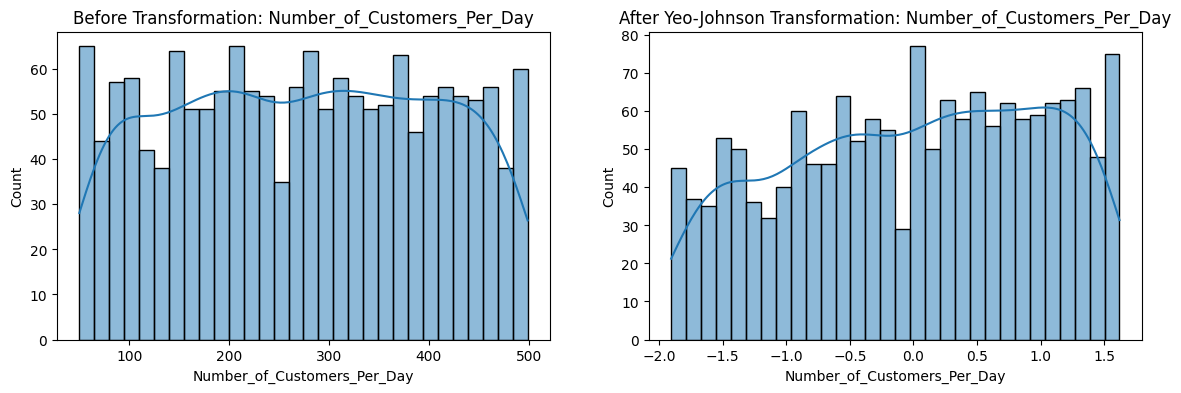

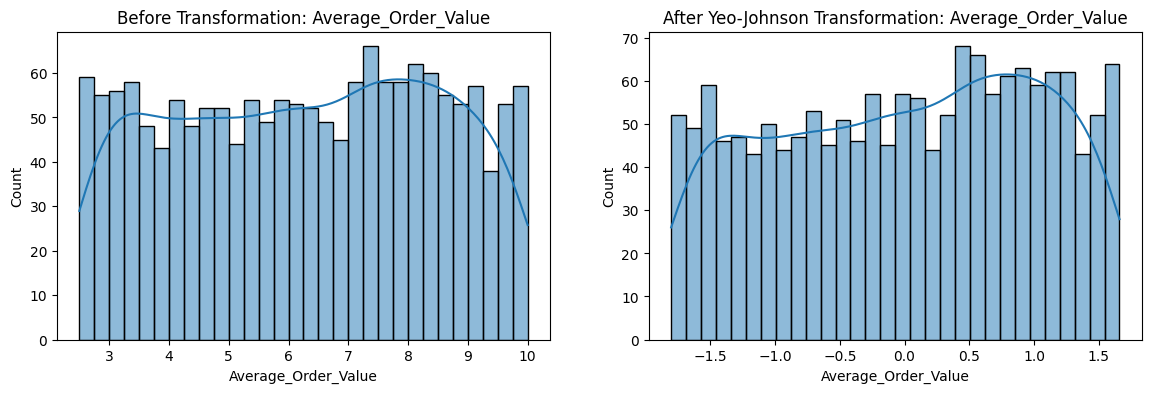

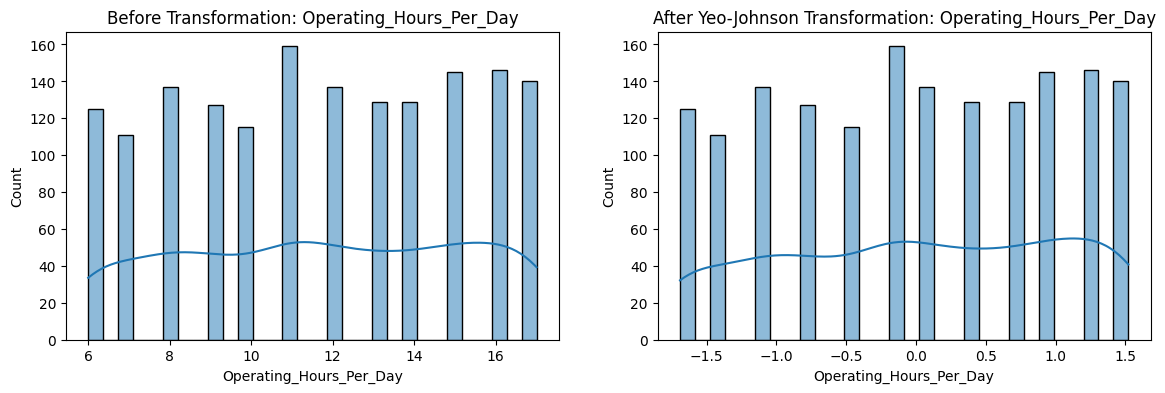

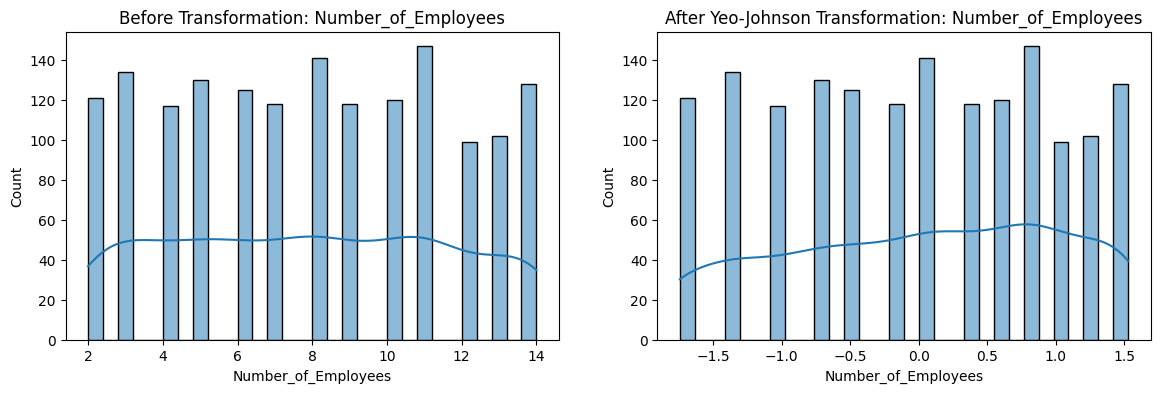

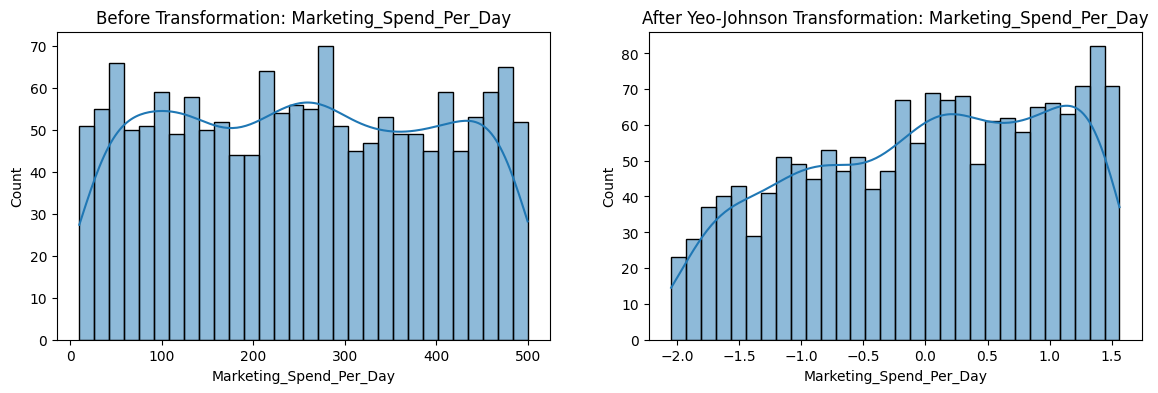

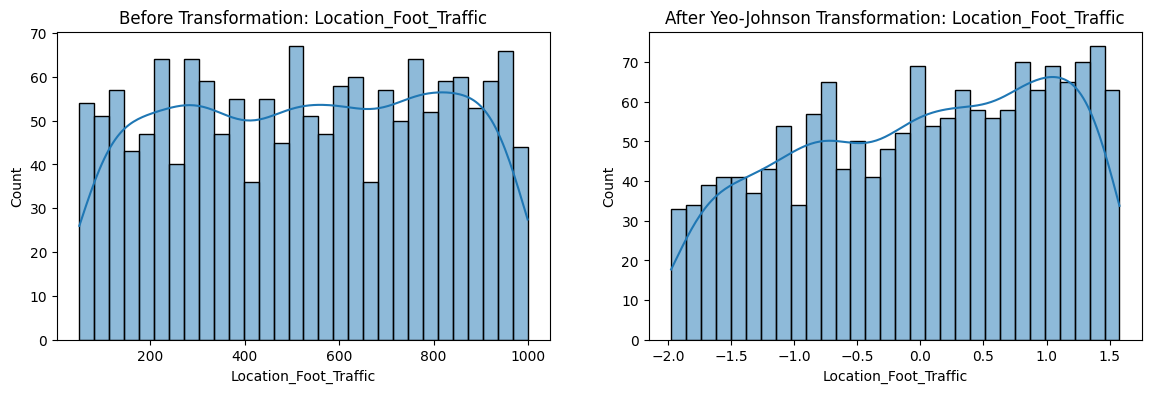

In [60]:
# Before and after comparision for Yeo-Johnson

for col in X_train.columns:
    plt.figure(figsize=(14, 4))

    # Original distribution
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.title(f"Before Transformation: {col}")

    # Transformed distribution
    plt.subplot(122)
    sns.histplot(X_train_transformed[col], kde=True, bins=30)
    plt.title(f"After Yeo-Johnson Transformation: {col}")

    plt.show()

In [ ]:
# Side by side Lambdas
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

# Thank You